# Overview:

The design of a bubble column is an extensively researched subject with applications in being used as a multiphase reactor. A key design parameter in bubble columns is gas hold-up, a variable often depending on a multitude of different column and material properties. Gas hold-up is defined as the volume fraction of gas in the total volume of gas-liquid phase in the column. This project is a data driven approach to predict gas hold-up in a bubble column based on 14 different independent variables including:

    1. Column diameter (m)
    2. Liquid Height (m)
    3. Sparger hole diameter (m)
    4. %FA
    5. Density of Gas (kg/m3)
    6. Viscosity of Gas (Pa.s)
    7. Molecular Weight of Gas (kg/mol)
    8. Density of Liquid (kg/m3)
    9. Viscosity of Liquid (Pa.s)
    10. Surface Tension of Liquid (N/m)
    11. i+ (k.ion/m3)
    12. Temperature (K)
    13. Pressure (kPa)
    14. Superficial gas velocity (m/s)
    
These independent variables (X1, X2, X3...) will be used to predict the dependent variable, gas hold-up (Y).  

# Why do we care?

Only empirical models have been developed so far to determine gas holdup. Accuracy for any given study varies to a certain degree. The idea behind using a ML model to predict gas holdup is two fold. The first reason to use a ML model is to accurately capture how different variables affect gas holdup. The second reason is to determine which variables ACTUALLLY affect gas holdup. Many experiments in the past have realized that variables such as superficial gas velocity and sparger design have a great impact on gas holdup. However, to what extent do other variables contribute compared to others? ML can help answer that question.

Source: https://www.sciencedirect.com/science/article/abs/pii/S0263876222002891

The image source: https://www.sciencedirect.com/science/article/abs/pii/S0263876222002891


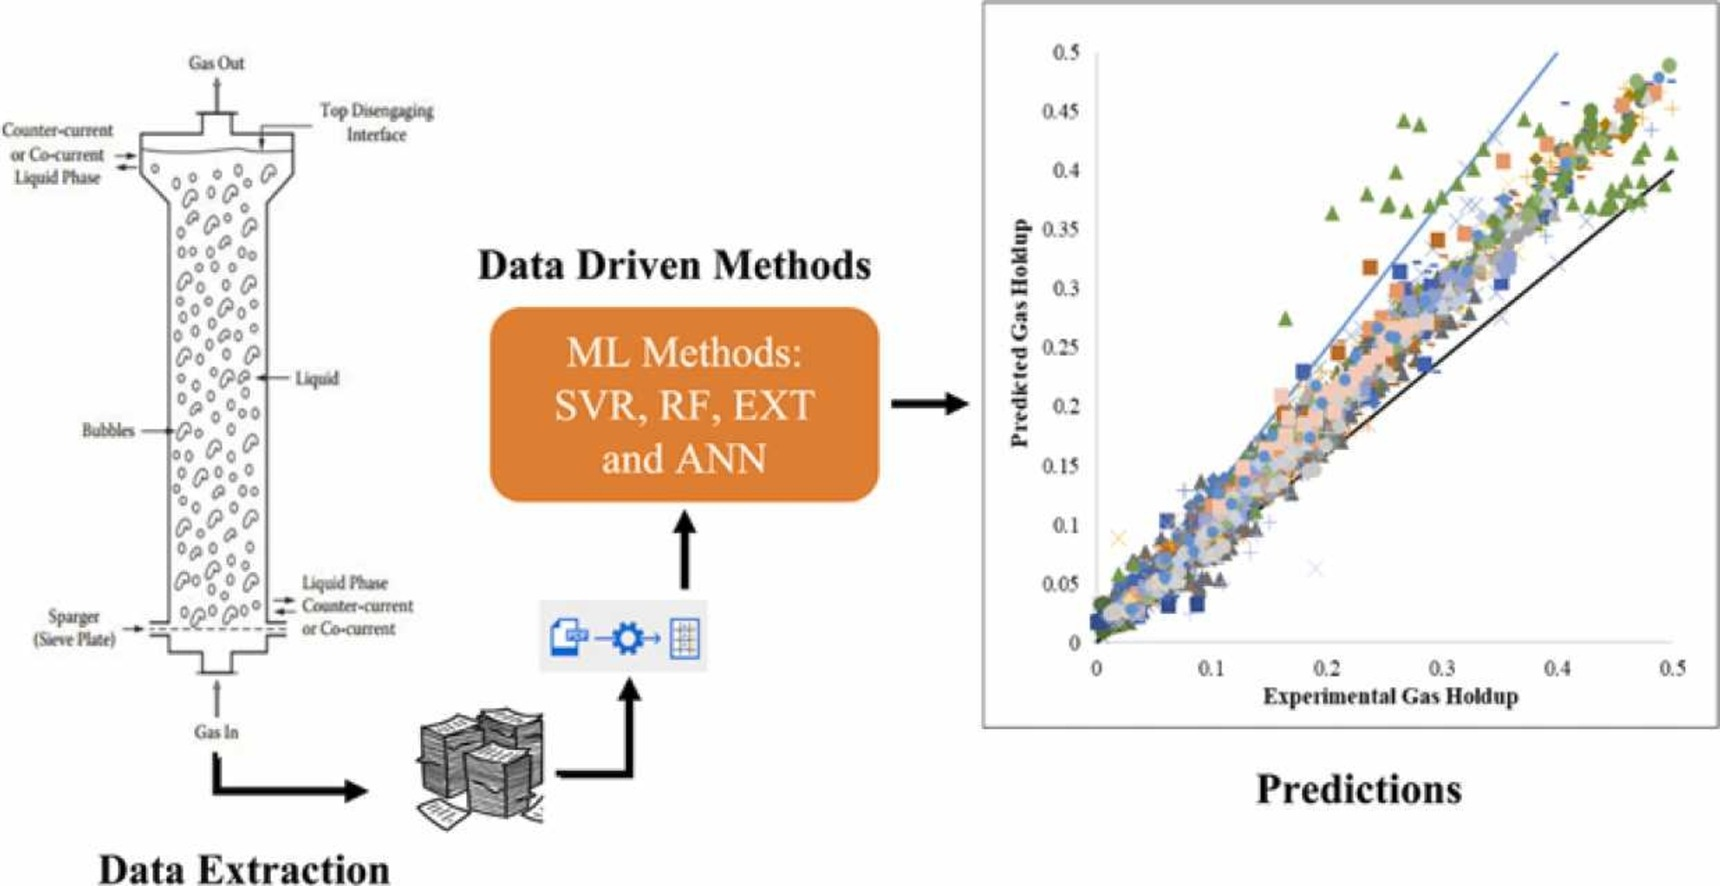

In [10]:
from IPython.display import Image

print('The image source: https://www.sciencedirect.com/science/article/abs/pii/S0263876222002891')
Image("Images/bubble column.jpg")

# Dataset:

A dataset containing 4042 datapoints have been gathered from multiple literature sources that cover various design and operating parameters in csv format. It is important to note that the majority of the data involves studies using air-water systems. The organization of the project is as follows:

    1. Preprocess dataset using pandas dataframe and standardize the data.
    
    2. Machine learning model Random Forest (RF) regressor is used to predict gas holdup.
    
    3. Obtain covariance matrix, addressing pairwise relationships between each feature. Use PCA explained variance ratio to understand the relative importance of each principal component. Refit RF model without redundant features.
    
    4. Use grid search method to obtain optimum model and hyperparameters.
    
    5. Determine features importance.

In [1]:
#import libraries
import pandas as pd
df = pd.read_csv('data/Data Sheet for Gas Holdup.csv')

#drop all nan columns/rows and the author column
df = df.dropna(axis=0, how='all').dropna(axis=1, how='all').drop(df.columns[0], axis=1)

print('The first five rows of the dataset are shown below')
df.head()

The first five rows of the dataset are shown below


,Gas holdup,Column diameter(m),Liquid height (m),Sparger hole diameter (m),%FA,Density of Gas (kg/m3),Viscosity of Gas (Pa.s),Molecular Weight of gas (kg/kmol),Density of Liquid (kg/m3),Viscosity of Liquid (Pa.s),Surface Tension of Liquid (N/m),i+ (k.ion/m3),Temperature (K),Pressure (kPa),Superficial gas velocity (m/s)
0,0.0294,0.1,0.4,0.00367,0.538756,1.18,0.000018,28.84,1010.0,0.0011,0.073,1.5,298.0,100.0,0.0172
1,0.0414,0.1,0.4,0.00367,0.538756,1.18,0.000018,28.84,1010.0,0.0011,0.073,1.5,298.0,100.0,0.0261
2,0.0601,0.1,0.4,0.00367,0.538756,1.18,0.000018,28.84,1010.0,0.0011,0.073,1.5,298.0,100.0,0.0347
3,0.0795,0.1,0.4,0.00367,0.538756,1.18,0.000018,28.84,1010.0,0.0011,0.073,1.5,298.0,100.0,0.0423
4,0.0945,0.1,0.4,0.00367,0.538756,1.18,0.000018,28.84,1010.0,0.0011,0.073,1.5,298.0,100.0,0.0511


In [2]:
# Preprocess data into categorical variables of X and Y
import numpy as np

#features
X = df.iloc[:,1:15]

#target variable - gas holdup
Y = df.iloc[:,0]
Y = np.ravel(Y)

In [3]:
# Create train-test split

from sklearn.model_selection import train_test_split

# train-test split
X_train, X_test, Y_train, Y_test = \
    train_test_split(X, Y,
                     test_size=0.20)

In [4]:
# Create RF regression model

from sklearn.ensemble import RandomForestRegressor

# make an RF for gas holdup using training set
regressor = RandomForestRegressor(n_estimators=100, random_state=0)
model = regressor.fit(X_train, Y_train)

Mean Squared Error: 0.0004905316945590789
R-squared: 0.9563531020468249


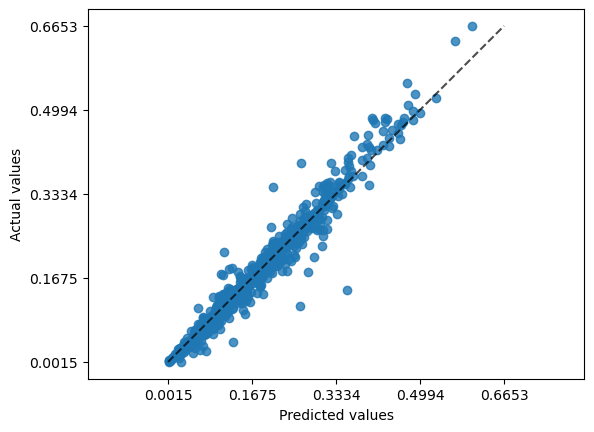

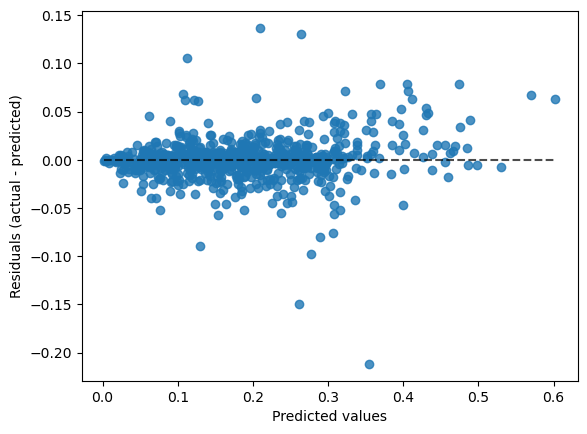

In [5]:
# Evaluate accuracy of regression using tesing set

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import PredictionErrorDisplay

prediction = model.predict(X_test)
mse = mean_squared_error(Y_test, prediction)
r2 = r2_score(Y_test, prediction)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')
disp = PredictionErrorDisplay(y_true = Y_test, y_pred = prediction)
disp.plot(kind = 'actual_vs_predicted')
disp.plot()

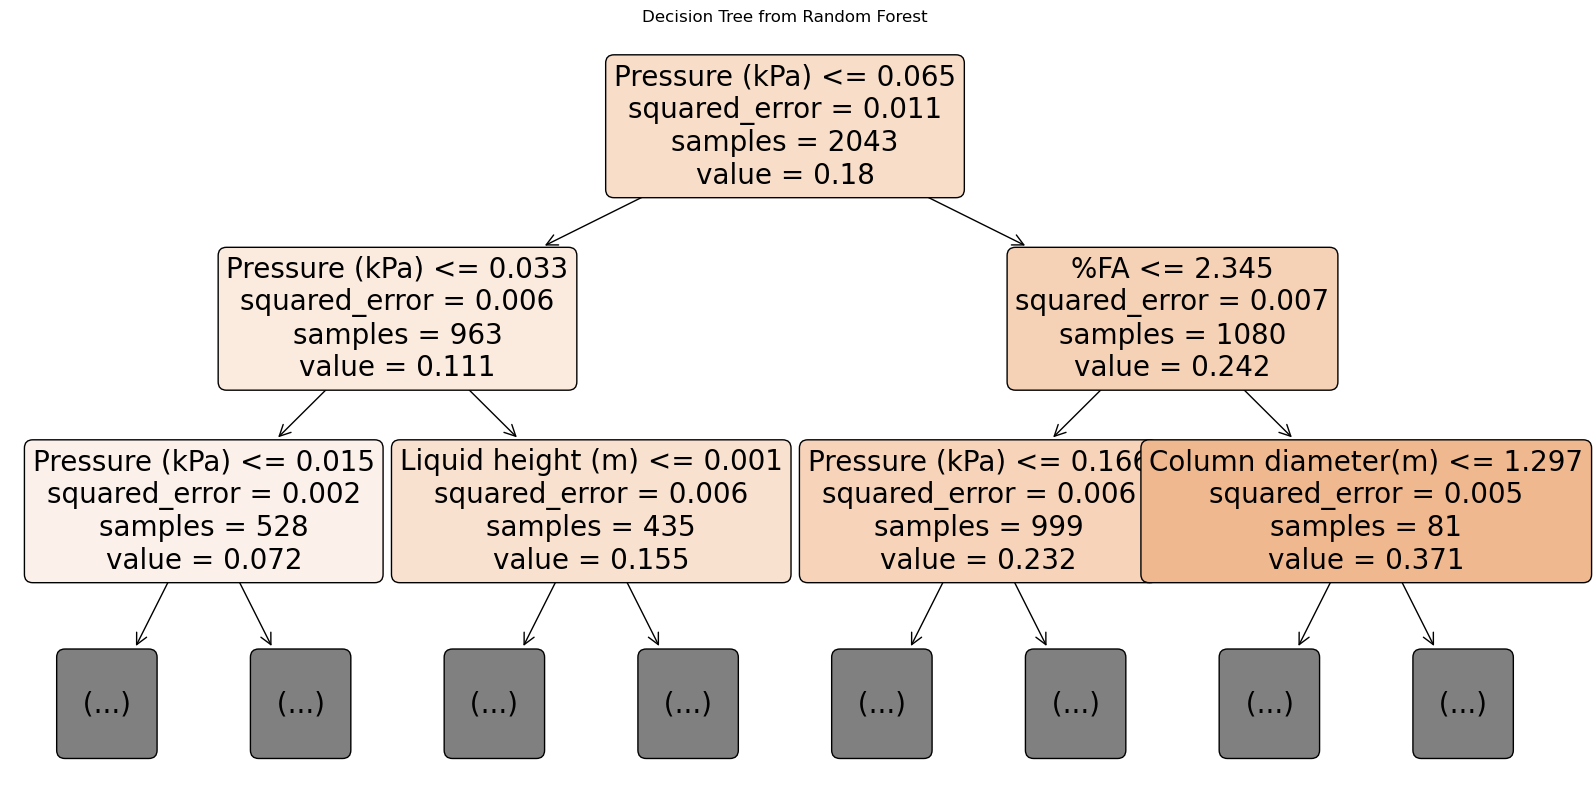

In [6]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Just to show a glimpse of 1 of the 100 decision trees created in the random forest algorithm
# Pick one tree from the forest, e.g., the first tree (index 0)
tree_to_plot = regressor.estimators_[0]
 
# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(tree_to_plot, feature_names=df.columns.tolist(), filled=True, rounded=True, fontsize=20, max_depth=2)
plt.title("Decision Tree from Random Forest")
plt.show()

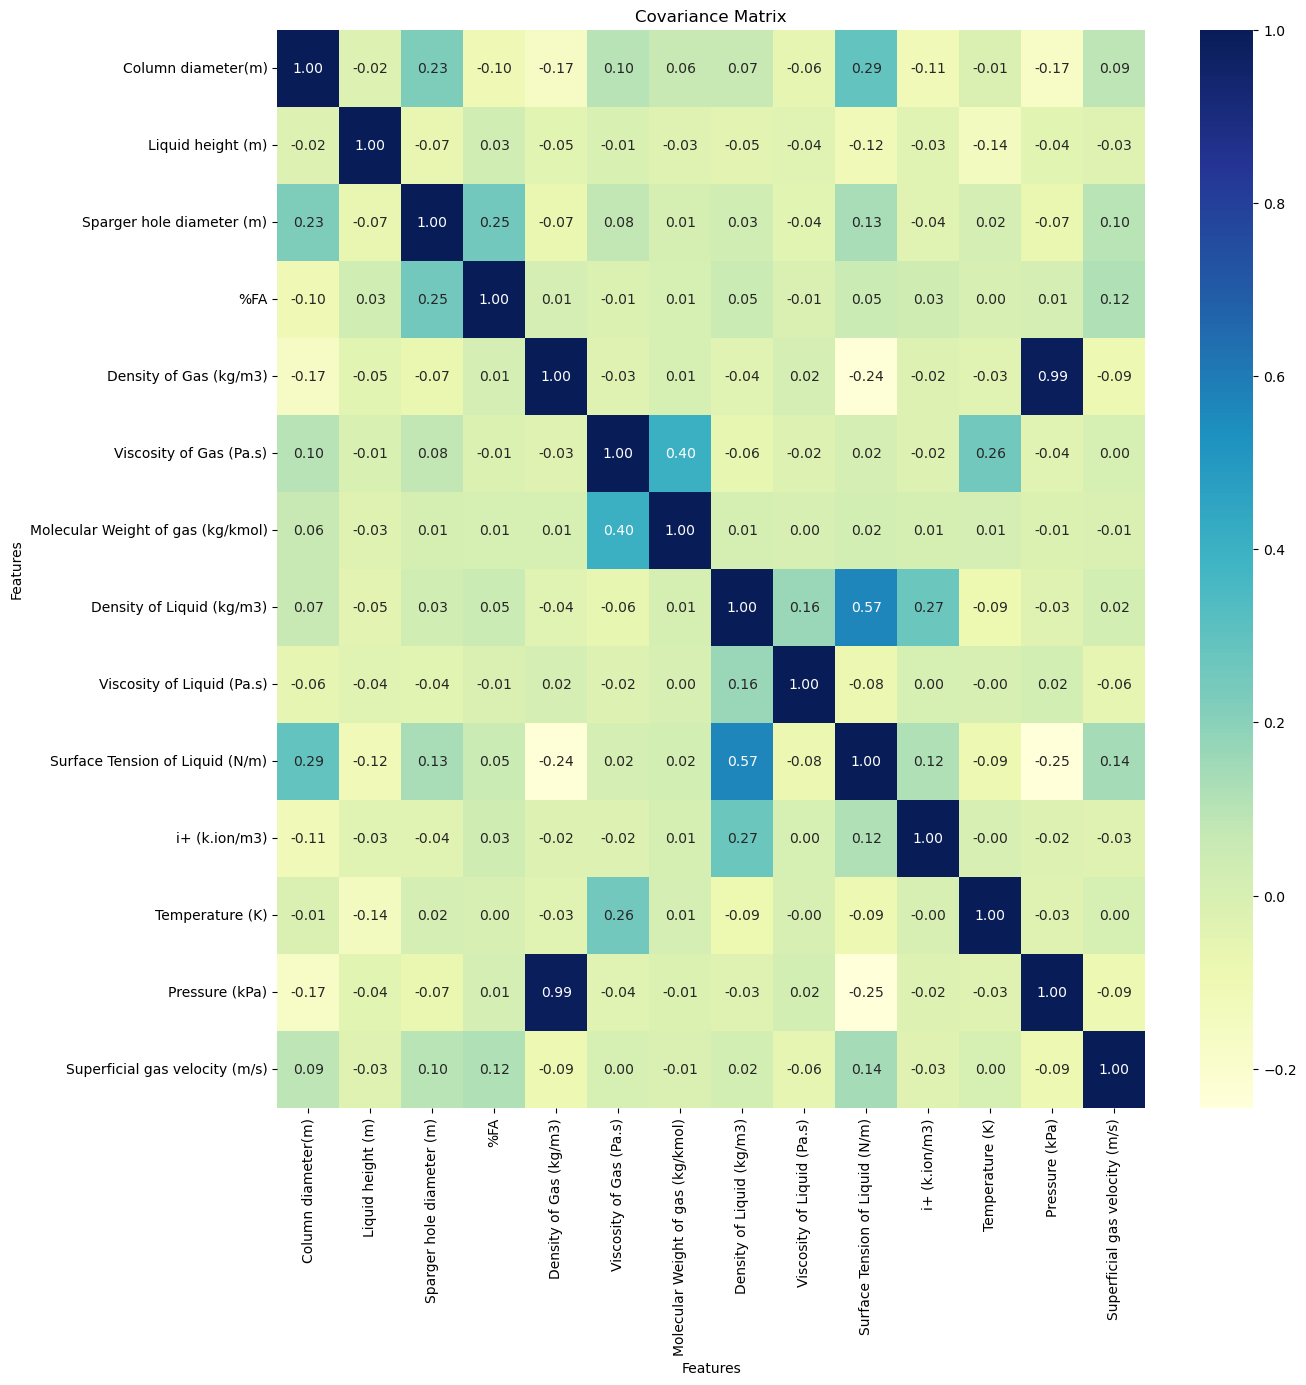

In [7]:
# Plot the covariance matrix as a heatmap to determine feature redudancy

import seaborn as sns

plt.figure(figsize=(14, 14))
sns.heatmap(X.corr(), annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Covariance Matrix")
plt.xlabel("Features")
plt.ylabel("Features")
plt.show()

We can clearly see that there are two pairs of features that are highly correlated with each other:

Surface tension + Density

Pressure + Density

Is there an obvious reason for these correlations?

Well, there's an obvious correlation of pressure and density.

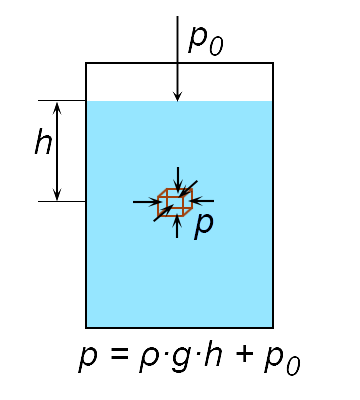

In [8]:
Image("Images/hydrostatic pressure.png", width=400)

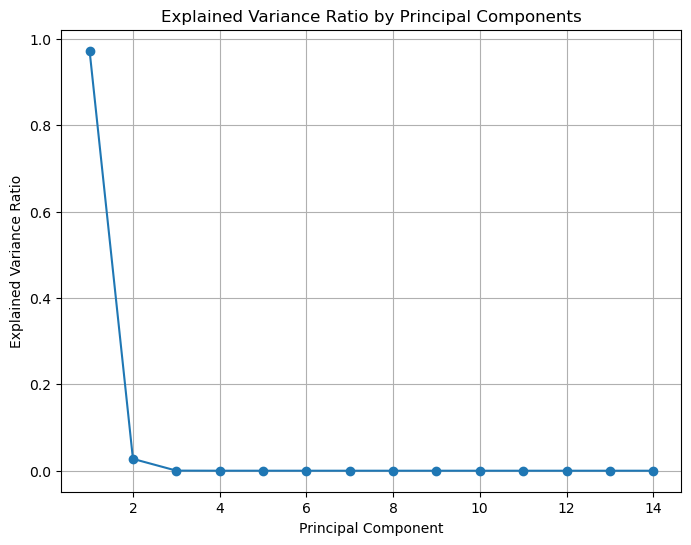

In [9]:
# Obtain PCA explained variance ratio to determine which how well the principle components summarize the variability in the dataset

from sklearn.decomposition import PCA

# Standardize the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit PCA to the data
pca = PCA().fit(X)

# Get the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Plot the explained variance ratio
plt.figure(figsize=(8,6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='-')
plt.title('Explained Variance Ratio by Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.show()

Mean Squared Error: 0.0005323814022488457
R-squared: 0.9526293672888755


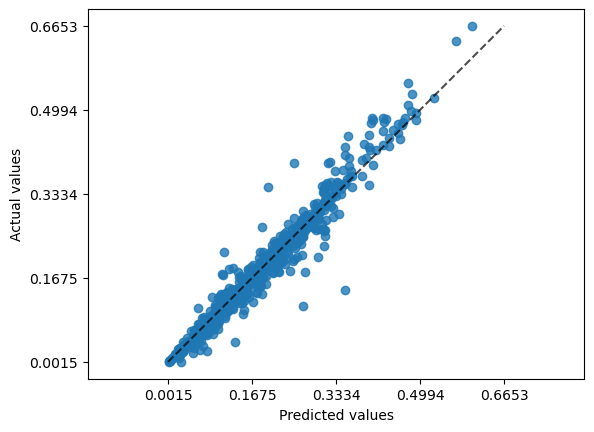

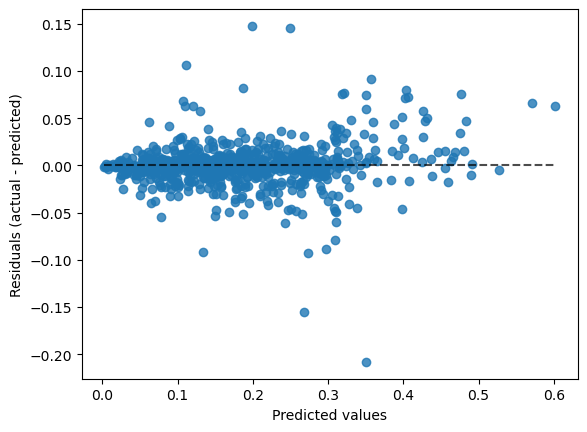

In [10]:
# Redo RF regression model without redundant features
# Drop surface tension, pressure, and density and refit
# Copy and paste the following labels in the .drop sections to determine effect dropping each
#Surface Tension of Liquid (N/m)
#Pressure (kPa)
#Density of Liquid (kg/m3)

X_train_drop = X_train.drop(['Density of Liquid (kg/m3)'],axis=1)
X_test_drop = X_test.drop(['Density of Liquid (kg/m3)'],axis=1)

regressor2 = RandomForestRegressor(n_estimators=100, random_state=0)
model2 = regressor2.fit(X_train_drop, Y_train)

prediction2 = model2.predict(X_test_drop)
mse = mean_squared_error(Y_test, prediction2)
r2 = r2_score(Y_test, prediction2)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')
disp = PredictionErrorDisplay(y_true = Y_test, y_pred = prediction2)
disp.plot(kind = 'actual_vs_predicted')
disp.plot()

Dropping each feature results in a (slightly) lower R-squared value

Original:
R-squared: 0.9646762739483636

Drop Surface Tension:
R-squared: 0.9621479771593398

Drop Pressure:
R-squared: 0.9641441655613836

Drop Density:
R-squared: 0.9633871869291959

In [11]:
# Perform grid method to obtain optimum model
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 150],  # Number of trees in the forest
    'max_depth': [None, 10, 20],      # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]     # Minimum number of samples required to be at a leaf node
}

regressor3 = RandomForestRegressor(random_state=0)
gs=GridSearchCV(regressor,param_grid,cv=5,scoring='r2')
gs.fit(X_train,Y_train)

# Get the best parameters
best_params = gs.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
best_model = gs.best_estimator_

# Evaluate the best model on the testing set
prediction3 = best_model.predict(X_test)
mse = mean_squared_error(Y_test, prediction3)
r2 = r2_score(Y_test, prediction3)
print(f'Best Model - Mean Squared Error: {mse}')
print(f'Best Model - R-squared: {r2}')

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
Best Model - Mean Squared Error: 0.0004927269839049924
Best Model - R-squared: 0.9561577679407486


Feature Importance:
                              Feature  Importance
13     Superficial gas velocity (m/s)    0.608571
2           Sparger hole diameter (m)    0.110445
4              Density of Gas (kg/m3)    0.064456
9     Surface Tension of Liquid (N/m)    0.040857
1                   Liquid height (m)    0.036668
3                                 %FA    0.031091
7           Density of Liquid (kg/m3)    0.029540
8          Viscosity of Liquid (Pa.s)    0.025640
12                     Pressure (kPa)    0.017381
10                      i+ (k.ion/m3)    0.008957
11                    Temperature (K)    0.008953
0                  Column diameter(m)    0.008341
5             Viscosity of Gas (Pa.s)    0.006479
6   Molecular Weight of gas (kg/kmol)    0.002623


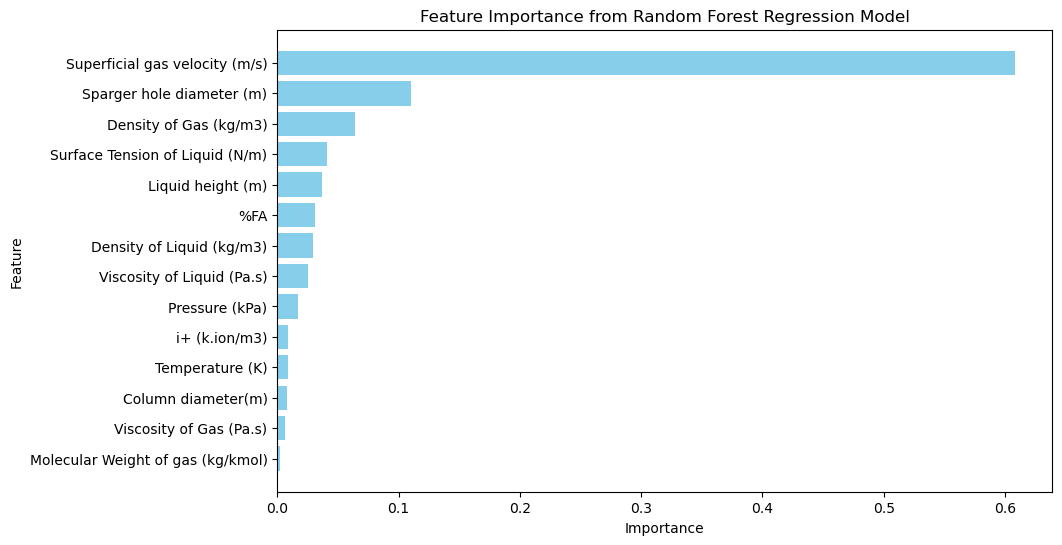

In [12]:
# Determine features importance

# Get feature importances from the trained random forest model
feature_importance = regressor.feature_importances_

# Create a DataFrame to organize feature importances
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})

# Sort the DataFrame by importance values in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print the sorted feature importances
print("Feature Importance:")
print(importance_df)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from Random Forest Regression Model')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature at the top
plt.show()

# What do the some of the features actually mean?

There is currently no available working theoretical equation that governs the value of gas holdup. Most equations are empirically generated from experiments of a certain application. Looking at the feature importance diagram, the top 5 features that have the largest impact on predicting gas holdup include:

1. Superficial gas velocity: the average velocity of the gas sparged into the column.

2. Sparger hole diameter: the diameter of the holes in the gas sparger at the bottom of the column.

3. Density of gas: gas density

4. Liquid height: the liquid height in the bubble column.

5. Surface tension of liquid: the tendency of molecules to stick together at the surface, forming a "film" to minimize surface area.


# Discussion

What are the actual implications of what we just learned?

Just as a reminder, the gas holdup is defined as the volume fraction of gas in the total volume of gas-liquid phase in the column. If the gas holdup is 0, then we have only liquid in the column and no reaction happenes. If the gas holdup is 1, then we only have gas in the column and no reaction happens as well. So, that means we want to find a happy medium depending on the application we want to look at. Here are a few examples:

1. Wastewater treatment:
    - The use of solvent sublation (SS) is an adsorptive bubble separation technique in which surface-active compounds (WASTE) in the aqueous phase are adsorbed on the bubble surfaces of an ascending gas stream and then collected in an organic layer placed on top of the aqueous phase. Understanding the gas holdup helps us to determine/improve the surface area between the liquid and gas phases. Sources:https://www.sciencedirect.com/science/article/abs/pii/S0021967309016719#:~:text=Solvent%20sublation%20is%20a%20kind%20of%20adsorptive%20bubble,layer%20placed%20on%20top%20of%20the%20aqueous%20phase.
https://pubs.acs.org/doi/10.1021/ie9503656

2. Bioreactors
    - Beer production: First realized as "tower fermentors" through a series of patents. First used for the production of alcoholic liquids, in particular beer. It is essential to use a flocculent yeast such that it would be easy to separate beer at the tower head. The mean wet yeast concentration should be kept at around 25% w/w. The value of the gas holdup can help to maintain the concentration of the yeast.
Sources: https://link.springer.com/chapter/10.1007/BFb0048441

3. CO2 capture with water bubble column
    - Carbon capture has been a hot topic in recent times due to rising CO2 levels in the atmosphere. Popular methods for CO2 capture include direct air capture, amine absorption, caustic scrubbing, and Selexol solvent. All methods have their pros and cons. Water can be used, but has a poor performance due to its poorer solubility of CO2, compared to amines. However, it is still studied as a potential option in a bubble column. The gas holdup value can be used to maximize/reach the solubility limit of CO2 in water.
Sources: https://www.mdpi.com/1996-1073/13/21/5793

# Conclusion

The RF Regressor machine learning model is a good tool to use to predict gas holdup in a bubble column based on the 14 parameters given from the dataset yielding a high r-squared value and low mean square error.

From the covariance matrix, we identified serveral features that could potentially be redudnant, but the later refitted models reveal that there is no significant impact upon removing the features. Those features being surface tension, pressure, and density.

The PCA explained variance ratio provides us insight to how much of the data can be captured with each principal component and found that over 90% of the data can be explained by the first principal component.

The grid search method was also used to obtain the optimum hyperparameters for the random forest model. The optimal hyperparameters are as follows:

1. Number of estimators (decision trees) = 150
2. Max tree depth = None (defaulted to expand until all branches reach a leaf node)
3. Minimum samples leaf = 1
4. Minimum samples split = 2

Using the built in feature importance tool in sklearn.ensemble.RandomForestRegressor, we can see that the following feature have the most impact on the predicted gas holdup:

1. superficial gas velocity
2. sparger hole diameter
3. density of gas
4. liquid height
5. surface tension of liquid